In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

# image_path = r"F:\Project\Detection_yolo\dataset\images\test\00004.png"
# image_path = r"F:\Project\Dataset\Train\0\00000_00003_00004.png"
image_path = r"F:\Project\Dataset\Train\0\00000_00003_00029.png"
# image_path = r"F:\Project\Detection_yolo\dataset\images\test\00002.png"
# image_path = r"F:\Project\Detection_yolo\dataset\images\test\00001.png"
# image_path = r"F:\Project\Dataset\Train\0\00000_00005_00028.png"
# image_path = r"F:\Project\Dataset\Train\0\00000_00003_00012.png"
# image_path = r"F:\Project\OGDATASET\Test\00012.png"
image = cv2.imread(image_path)

NORMALIZING

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0  

MEDIAN_FILTER

In [ ]:
# image_denoised = cv2.fastNlMeansDenoisingColored(
#     (image * 255).astype(np.uint8), None, 
#     3, 3, 7, 21  # Lower h values for less smoothing
# ) / 255.0

# sharpen_kernel = np.array([[0, -1, 0],
#                            [-1,  5, -1],
#                            [0, -1, 0]])


# image_sharpened = cv2.filter2D(image_denoised, -1, sharpen_kernel)



In [ ]:
# image_denoised = cv2.medianBlur((image * 255).astype(np.uint8), 3) / 255.0  # Apply median filter
# # image_denoised = median_filter(image,3)
# # Ensure the image is in the correct format (8-bit, 3 channels)
# image_uint8 = (image * 255).astype(np.uint8) if image.dtype != np.uint8 else image

# # Apply non-local means denoising (corrected argument order)
# image_denoised = cv2.fastNlMeansDenoisingColored(image_uint8, None, 3, 3, 7, 21)







# sharpen_kernel = np.array([[0, -1, 0],
#                            [-1,  5, -1],
#                            [0, -1, 0]])

# image_sharpened = cv2.filter2D(image_denoised, -1, sharpen_kernel)


In [ ]:
# sharpen_kernel = np.array([[0, -1, 0],
#                            [-1,  5, -1],
#                            [0, -1, 0]])

# image_sharpened = cv2.filter2D(image, -1, sharpen_kernel)


DEBLUR_LUCY_RICHARDSON

In [ ]:
def richardson_lucy_rgb(image, psf, num_iterations):

    if image.dtype == np.uint8:
        image = image.astype(np.float32) / 255.0  

    psf = psf / np.sum(psf)  
    psf_flip = cv2.flip(psf, -1)  

    channels = cv2.split(image)  
    deblurred_channels = []

    for ch in channels:
        estimate = ch.copy()

        for _ in range(num_iterations):
            blurred_estimate = cv2.filter2D(estimate, -1, psf)
            ratio = np.clip(ch / (blurred_estimate + 1e-8), 0, 2)  
            correction = cv2.filter2D(ratio, -1, psf_flip)
            estimate *= correction  

        deblurred_channels.append(np.clip(estimate, 0, 1))

    deblurred_image = cv2.merge(deblurred_channels)  
    print("Deblurred Image Shape:", deblurred_image.shape)  

    return deblurred_image

In [ ]:
psf = np.array([[1, 4, 7, 4, 1],
                [4, 16, 26, 16, 4],
                [7, 26, 41, 26, 7],
                [4, 16, 26, 16, 4],
                [1, 4, 7, 4, 1]], dtype=np.float32)

In [ ]:
deblurred_image = richardson_lucy_rgb(image, psf, num_iterations=15)

Deblurred Image Shape: (30, 28, 3)


HISTOGRAM_EQUALIZATION

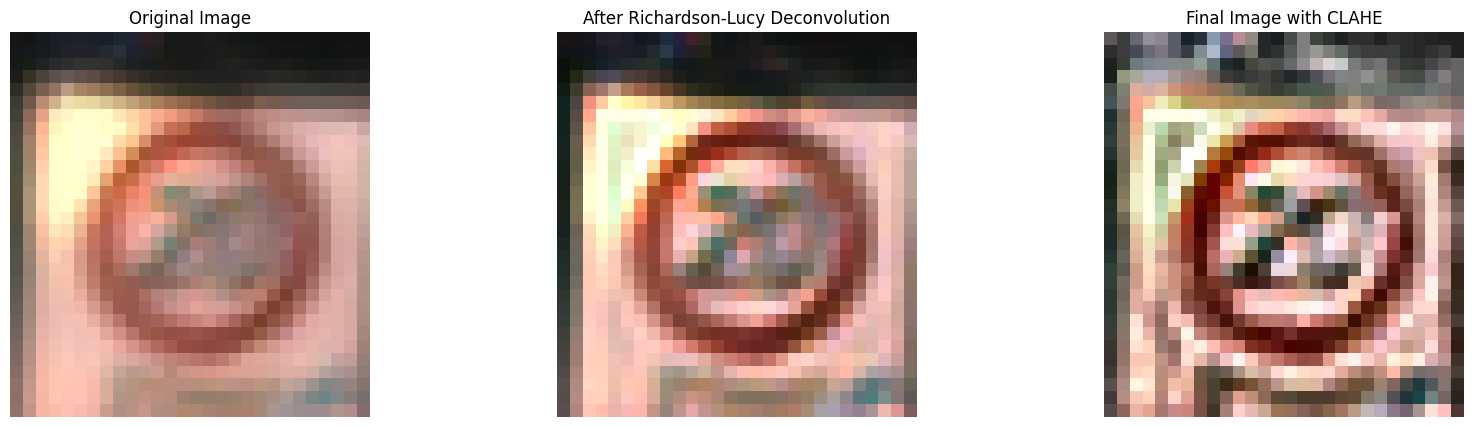

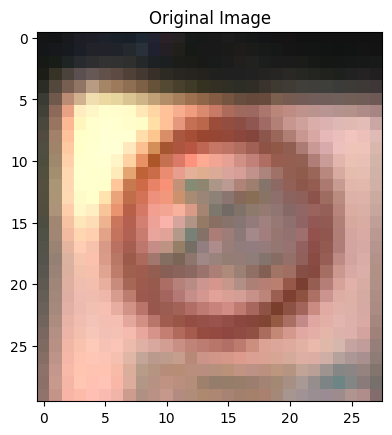

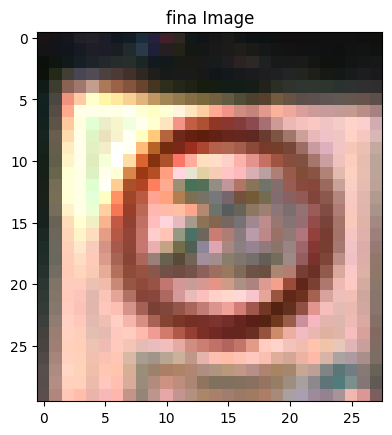

In [ ]:
# def apply_gamma_correction(image, gamma=1.2):
#     image = (image * 255).astype(np.uint8)  

   
#     inv_gamma = 1.0 / gamma
#     table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(256)]).astype("uint8")

    
#     corrected_image = cv2.LUT(image, table).astype(np.float32) / 255.0
#     return corrected_image
# final_image = apply_gamma_correction(deblurred_image)

def apply_clahe_rgb(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Convert to LAB color space
    lab = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2LAB)
    
    # Split into channels
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE to the L (lightness) channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    l_clahe = clahe.apply(l)
    
    # Merge CLAHE-enhanced L channel with original a and b channels
    lab_clahe = cv2.merge((l_clahe, a, b))
    
    # Convert back to RGB
    rgb_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)
    
    # Normalize to [0,1] float32
    return rgb_clahe.astype(np.float32) / 255.0

final_image = apply_clahe_rgb(deblurred_image)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# axes[1].imshow(image_sharpened)
# axes[1].set_title("After Median Filter")
# axes[1].axis("off")

axes[1].imshow(deblurred_image)
axes[1].set_title("After Richardson-Lucy Deconvolution")
axes[1].axis("off")

axes[2].imshow(final_image)
axes[2].set_title("Final Image with CLAHE")
axes[2].axis("off")

plt.show()

plt.imshow(image)
plt.title("Original Image")
plt.show()


plt.imshow(deblurred_image)
plt.title("fina Image")
plt.show()

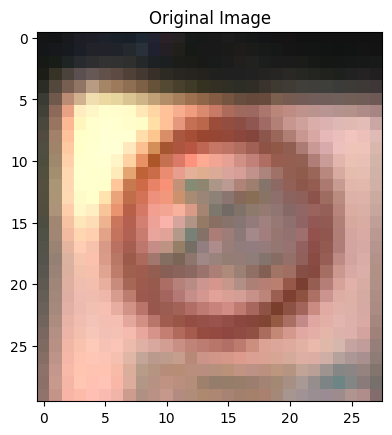

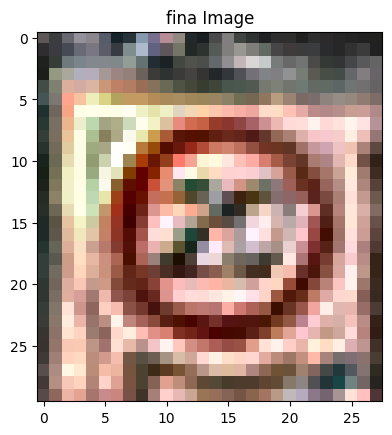

In [ ]:
plt.imshow(image)
plt.title("Original Image")
plt.show()


plt.imshow(final_image)
plt.title("fina Image")
plt.show()

In [ ]:
fn = cv2.cvtColor((final_image * 255).astype(np.float32), cv2.COLOR_RGB2BGR)
# db = cv2.cvtColor(deblurred_image,cv2.COLOR_RGB2BGR)
# md = cv2.cvtColor((image_sharpened).astype(np.float32),cv2.COLOR_RGB2BGR)

In [44]:
cv2.imwrite('newfile_noMD.png',fn)

True

In [ ]:
cv2.imshow("final_image",fn)
# cv2.imshow("og",og)
# cv2.imshow("md",md)
cv2.waitKey(0)
cv2.destroyAllWindows()
